In [1]:
import camelot
import pandas as pd
import numpy as np
from IPython.display import display
import os
from pathlib import Path
import ocrmypdf

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image

import pytesseract
from pdf2image import convert_from_path
import xlsxwriter

In [3]:
input_path_to_a = Path('data/a.pdf')
images_path = 'process_data/a_images/'

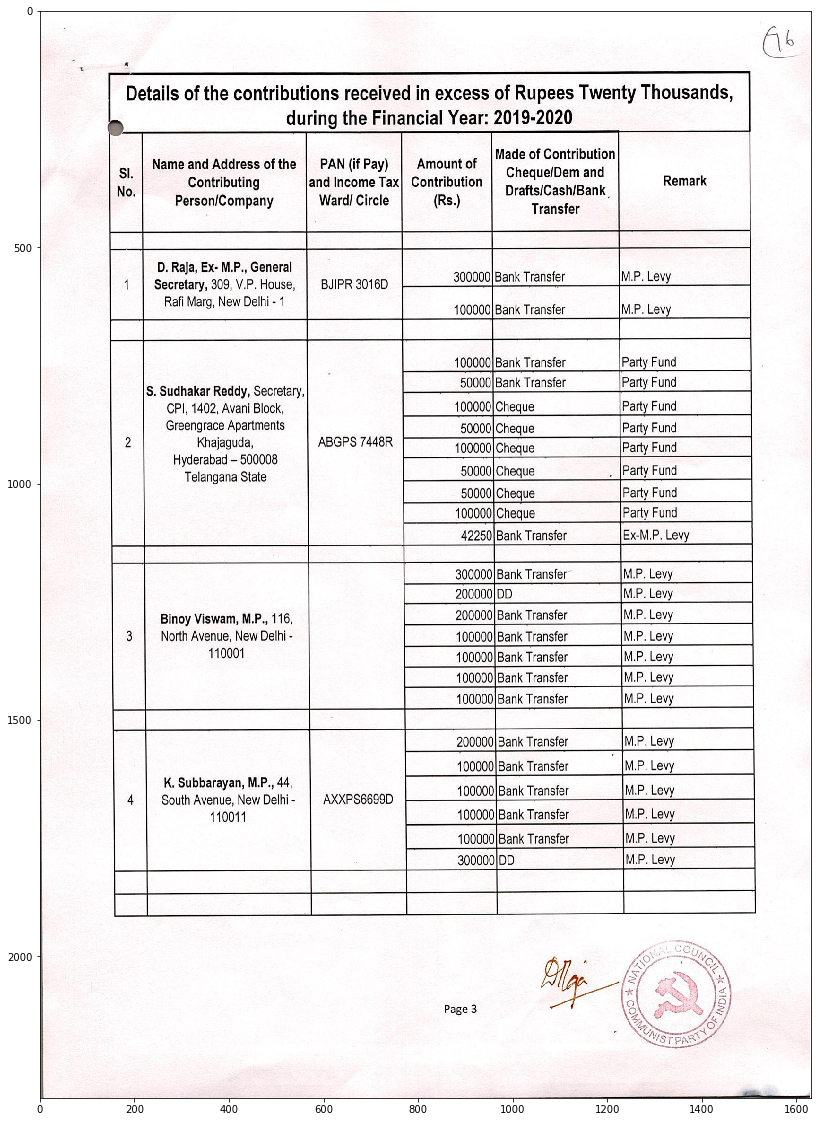

In [4]:
#read your file
file = images_path+'0.png'
img = cv2.imread(str(file))
# img = cv2.GaussianBlur(img, (5, 5), 0)
# img = cv2.Canny(img, 75, 200)
plt.figure(figsize = (40,20))
plotting = plt.imshow(img)
plt.show()

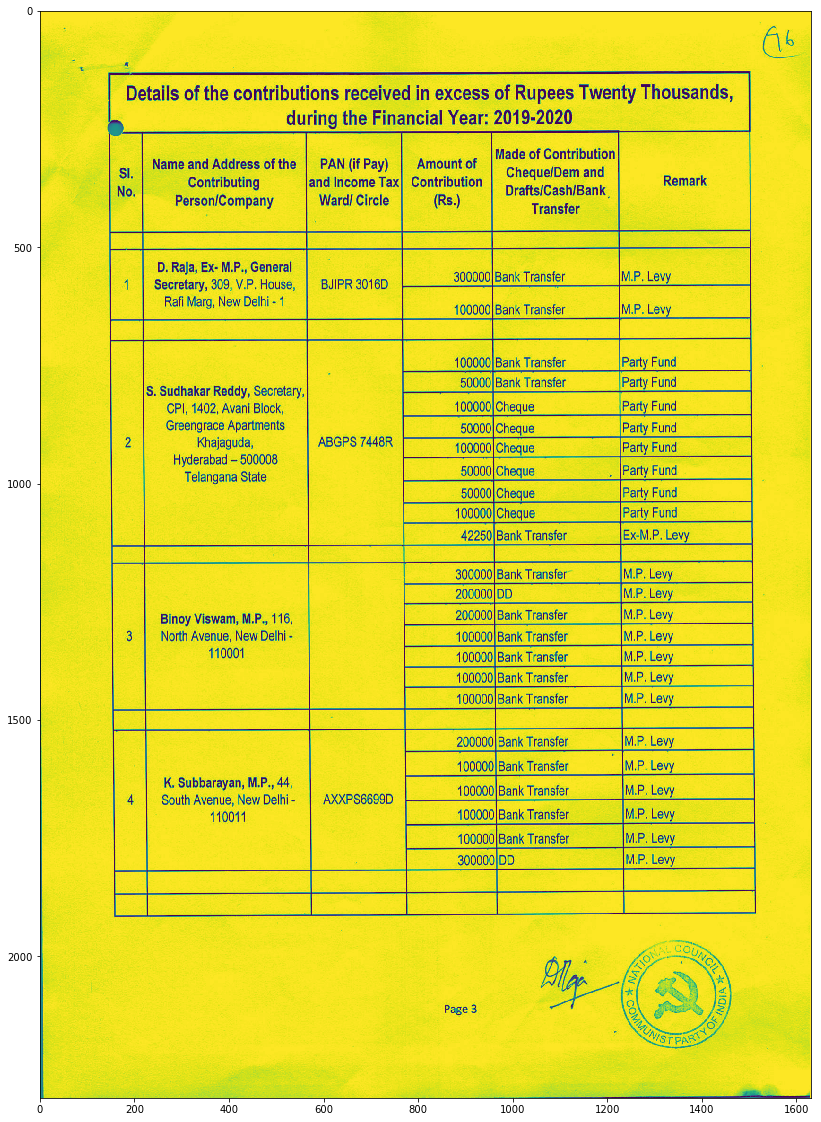

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (40,20))
plotting = plt.imshow(img)
plt.show()

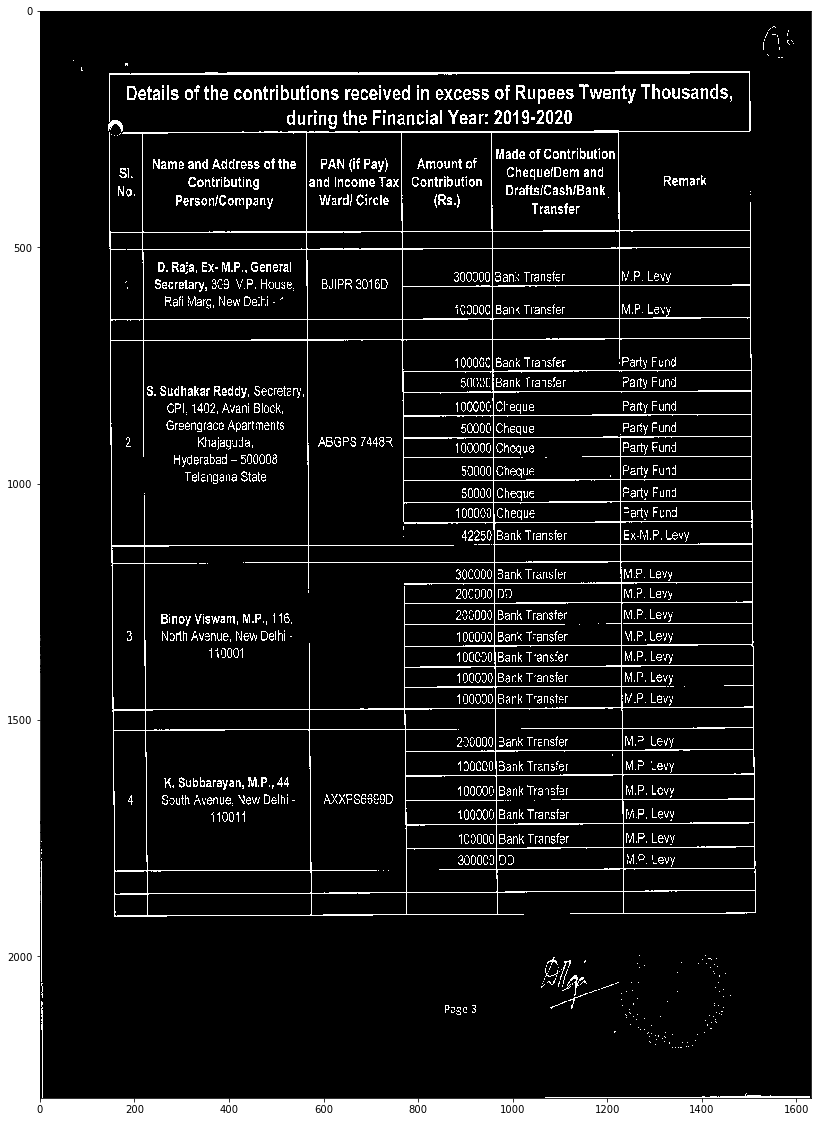

In [6]:
img.shape#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,120,255,cv2.THRESH_BINARY )#inverting the image 
img_bin = 255-img_bin
# cv2.imwrite('/Users/YOURPATH/cv_inverted.png',img_bin)#Plotting the image to see the output
plt.figure(figsize = (40,20))
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [7]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

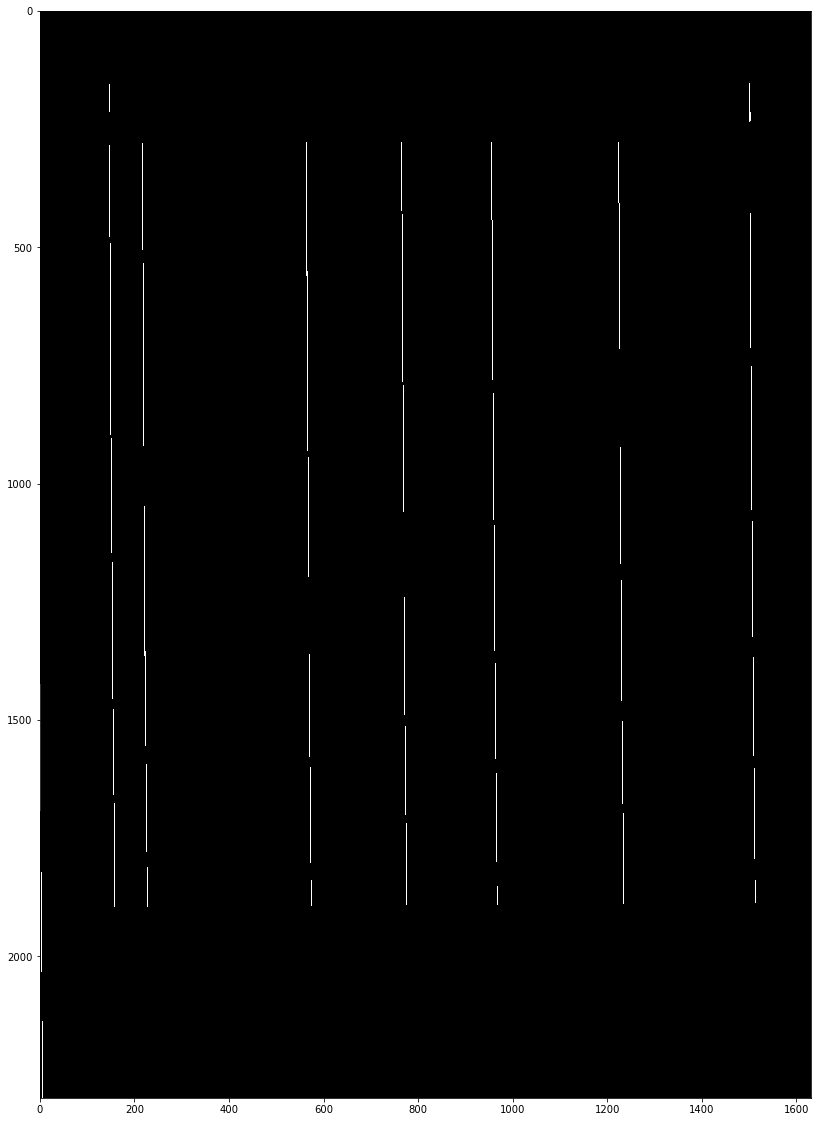

In [8]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
# cv2.imwrite("/Users/YOURPATH/vertical.jpg",vertical_lines)#Plot the generated image
plt.figure(figsize = (40,20))
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

In [9]:
image_1.shape

(2300, 1631)

In [10]:
indices = np.where(image_1 == [255])
indices
coordinates = zip(indices[0], indices[1])
coordinates

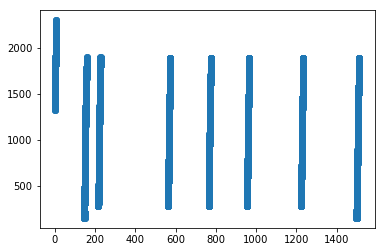

In [11]:
x = indices[0]
y = indices[1]
plt.scatter(y,x)
plt.show()

In [12]:
len(y),len(x)

(23004, 23004)

In [14]:
from collections import Counter
C = Counter(y)
z = [ [k,]*v for k,v in C.items()]
dic = {}
for arr in z:
    dic[arr[0]] = arr
keys = sorted(dic.keys())
keys
arr = []
arr1 = []
for i, val in enumerate(keys):
    if(i+1==len(keys)):
        if ((val-keys[i-1])<=20):
            arr1.append(val)
        arr.append(arr1)
        break
    if ((keys[i+1]-val)<=20):
        arr1.append(val)
    else:
        arr.append(arr1)
        arr1=[]
print(len(arr))
mean_value = []
for val in arr:
    mean_value.append(int(sum(val)/len(val)))
    print(len(val))
mean_value

for val in mean_value:
    if(val<=20):
        mean_value.remove(val)
    if(val>=1610):
        mean_value.remove(val)
print(mean_value)
y1=[]
for val in y:
    a=0
    for m_val in mean_value:
        if((val<=20 or val>=1610) and a==0):
#             print(val,m_val,abs(val-m_val))
            a=a+1
            y1.append(-1)
        elif(abs(val-m_val)<=20):
#             print(val,m_val,abs(val-m_val))
            a=a+1
            y1.append(m_val)
len(y1),len(y)      

8
5
13
12
12
12
12
12
15
[151, 220, 567, 769, 960, 1228, 1506]


(23004, 23004)

23004 23004


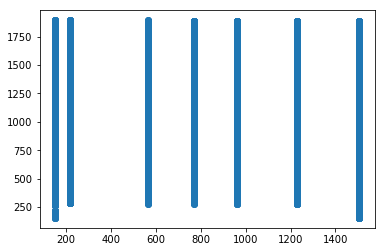

In [15]:
print(len(x),len(y1))
x2=x.tolist()
y2=y1.copy()
# y2 = np.array(y2)
# x2= np.array(x2)
x3=[]
y3=[]
for i, val in enumerate(zip(y2,x2)):
    if val[0]<=5:
#         print(val,i)
#         np.delete(x2,i)
#         np.delete(y2,i)
        continue
#     else:
    x3.append(val[1])
    y3.append(val[0])
plt.scatter(y3,x3)
plt.show()
# sum([i<10 for i in y2]),[[i,n] for n,i in enumerate(zip(y2,x2)) if i[0]<10],len(y2)

225


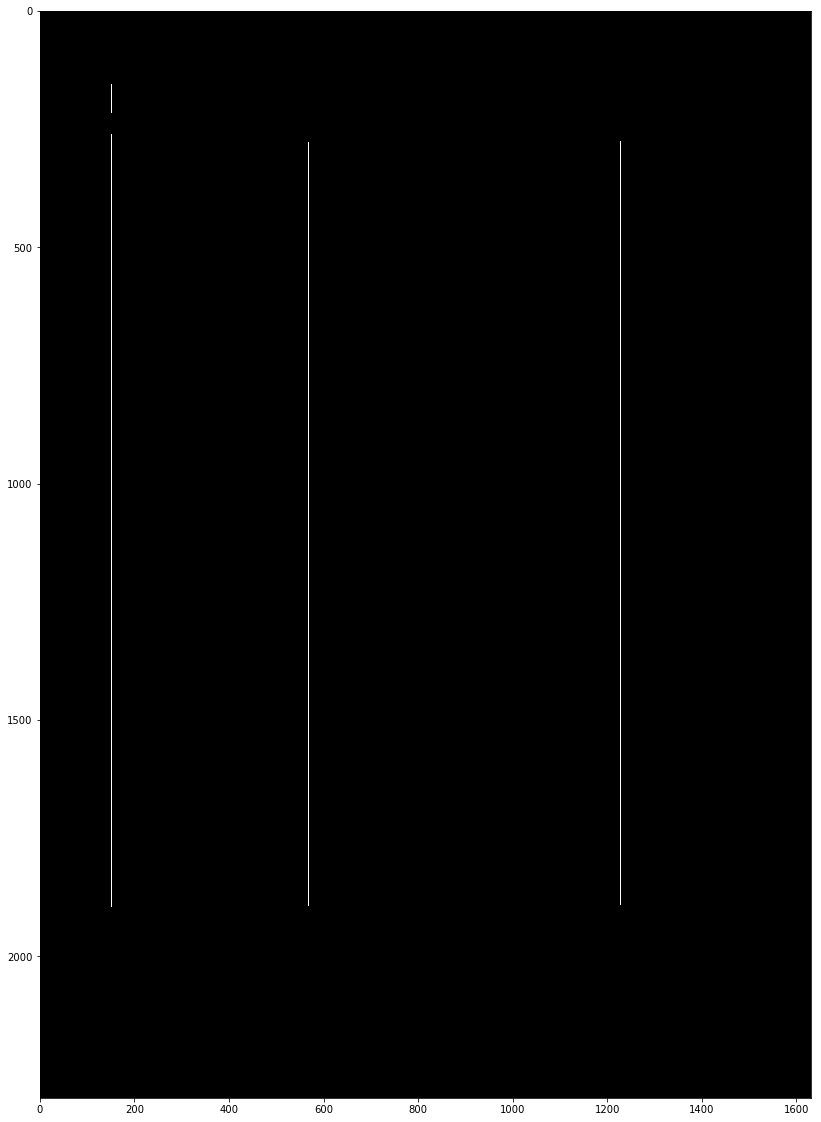

(2300, 1631)

In [16]:
w=1631
h=2300
# Make empty black image
white = 225
image=np.zeros((h,w),np.uint8)
for val in zip(x3,y3):
    image[val[0],val[1]]=white
    for i in range(1,2):
        image[val[0]-i,val[1]]=white
        image[val[0]+i,val[1]]=white
print(image[500,1506])
plt.figure(figsize = (40,20))
plotting = plt.imshow(image,cmap='gray')
plt.show()
image_1 = image
image.shape

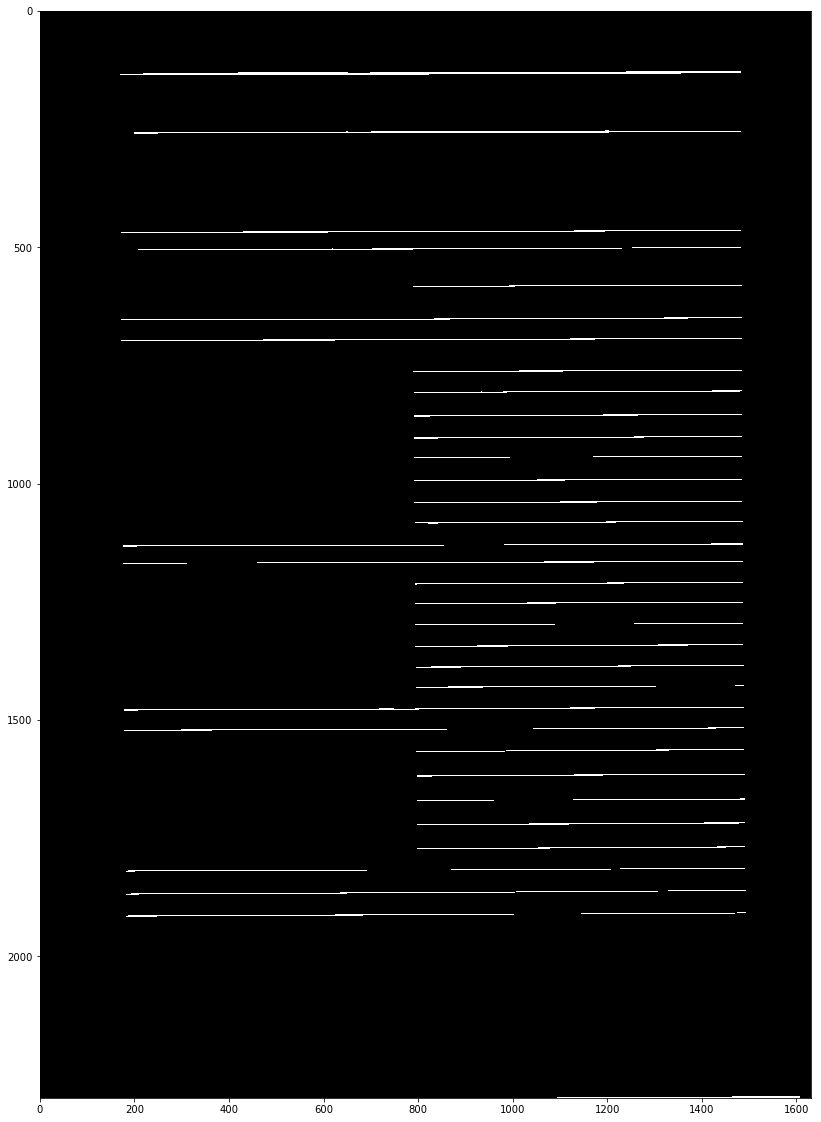

In [17]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
# cv2.imwrite("/Users/YOURPATH/horizontal.jpg",horizontal_lines)#Plot the generated image
plt.figure(figsize = (40,20))
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

In [48]:
indices = np.where(image_2 == [255])
indices
coordinates = zip(indices[0], indices[1])
coordinates

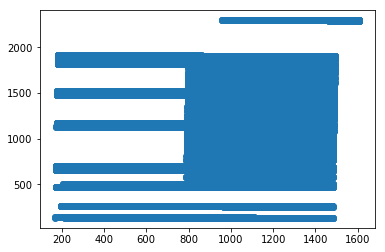

In [49]:
y = indices[0]
x = indices[1]
plt.scatter(x,y)
plt.show()

In [50]:
from collections import Counter
C = Counter(y)
z = [ [k,]*v for k,v in C.items()]
dic = {}
for arr in z:
    dic[arr[0]] = arr

In [51]:
keys = sorted(dic.keys())
# keys = sorted(long_lines)
keys
print(keys)
arr = []
arr1 = []
for i, val in enumerate(keys):
    if(i+1==len(keys)):
        print(val, keys[i-1])
        if ((val-keys[i-1])<=20):
            arr1.append(val)
        arr.append(arr1)
        break
    if ((keys[i+1]-val)<=20):
        arr1.append(val)
    else:
        arr.append(arr1)
        arr1=[]
print(arr)
mean_value = []
for val in arr:
    mean_value.append(int(sum(val)/len(val)))
    print(len(val))
mean_value

for val in mean_value:
    if(val<=20):
        mean_value.remove(val)
    if(val>=2280):
        mean_value.remove(val)
print(mean_value)
y1=[]
for val in y:
    a=0
    for m_val in mean_value:
        if((val<=20 or val>=1610) and a==0):
#             print(val,m_val,abs(val-m_val))
            a=a+1
            y1.append(-1)
        elif(abs(val-m_val)<=20):
#             print(val,m_val,abs(val-m_val))
            a=a+1
            y1.append(m_val)
len(y1),len(y)      

[130, 131, 132, 133, 134, 135, 136, 137, 254, 255, 256, 257, 258, 259, 260, 261, 465, 466, 467, 468, 469, 470, 502, 503, 504, 505, 506, 581, 582, 583, 584, 650, 651, 652, 653, 654, 655, 693, 694, 695, 696, 697, 698, 699, 761, 762, 763, 764, 765, 804, 805, 806, 807, 808, 854, 855, 856, 857, 858, 859, 901, 902, 903, 904, 905, 942, 943, 944, 945, 946, 947, 991, 992, 993, 994, 995, 1038, 1039, 1040, 1041, 1042, 1080, 1081, 1082, 1083, 1084, 1085, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1209, 1210, 1211, 1212, 1213, 1214, 1251, 1252, 1253, 1254, 1255, 1295, 1296, 1297, 1298, 1299, 1300, 1341, 1342, 1343, 1344, 1345, 1346, 1384, 1385, 1386, 1387, 1388, 1389, 1427, 1428, 1429, 1430, 1431, 1432, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1563, 1564, 1565, 1566, 1567, 1568, 1615, 1616, 1617, 1618, 1619, 1620, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1717, 1718, 1719, 1720, 1721, 1722, 1768, 1

(89176, 74808)

In [65]:
print(len(x),len(y1))
x2=x.tolist()
y2=y1.copy()

C = Counter(y2)
z = [ [k,]*v for k,v in C.items()]
dic2 = {}
for arr2 in z:
    dic2[arr2[0]] = arr2
print(dic2.keys())
max_line=0
for key in dic2.keys():
    l=len(dic2[key])
    if key==-1:
        continue
    if(l>max_line):max_line=l
print(max_line)
long_line=[]
for key in dic2.keys():
    l=len(dic2[key])
    print(l)
    if(l>=0.5*max_line):
        long_line.append(key)
long_line

74808 89176
dict_keys([133, 257, 467, 503, 582, 652, 695, 762, 805, 856, 902, 944, 992, 1039, 1082, 1130, 1166, 1211, 1252, 1297, 1343, 1386, 1429, 1476, 1519, 1565, -1, 1617, 1668, 1719, 1770, 1816, 1864, 1911])
5718
5718
4891
3015
2644
1411
2859
2883
1603
1498
1574
1520
1492
1543
1651
1539
3235
3224
1565
1537
1565
1597
1536
1574
2935
2782
1459
15958
1569
1471
1652
1455
2697
2671
2853


[133, 257, 467, 652, 695, 1130, 1166, 1476, -1]

In [68]:
# x3=[]
y3=[]
print(len(y2))
for val in y2:
    if(val in long_line):
         y3.append(val)
    else:
        y3.append(-1)
len(y3)

89176


89176

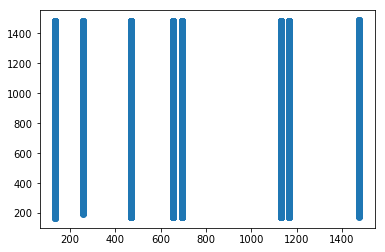

In [70]:

# y2 = np.array(y2)
# x2= np.array(x2)
x4=[]
y4=[]
for i, val in enumerate(zip(y3,x2)):
    if val[0]<=5:
#         print(val,i)
#         np.delete(x2,i)
#         np.delete(y2,i)
        continue
#     else:
    x4.append(val[1])
    y4.append(val[0])
plt.scatter(y4,x4)
plt.show()
# sum([i<10 for i in y2]),[[i,n] for n,i in enumerate(zip(y2,x2)) if i[0]<10],len(y2)

0


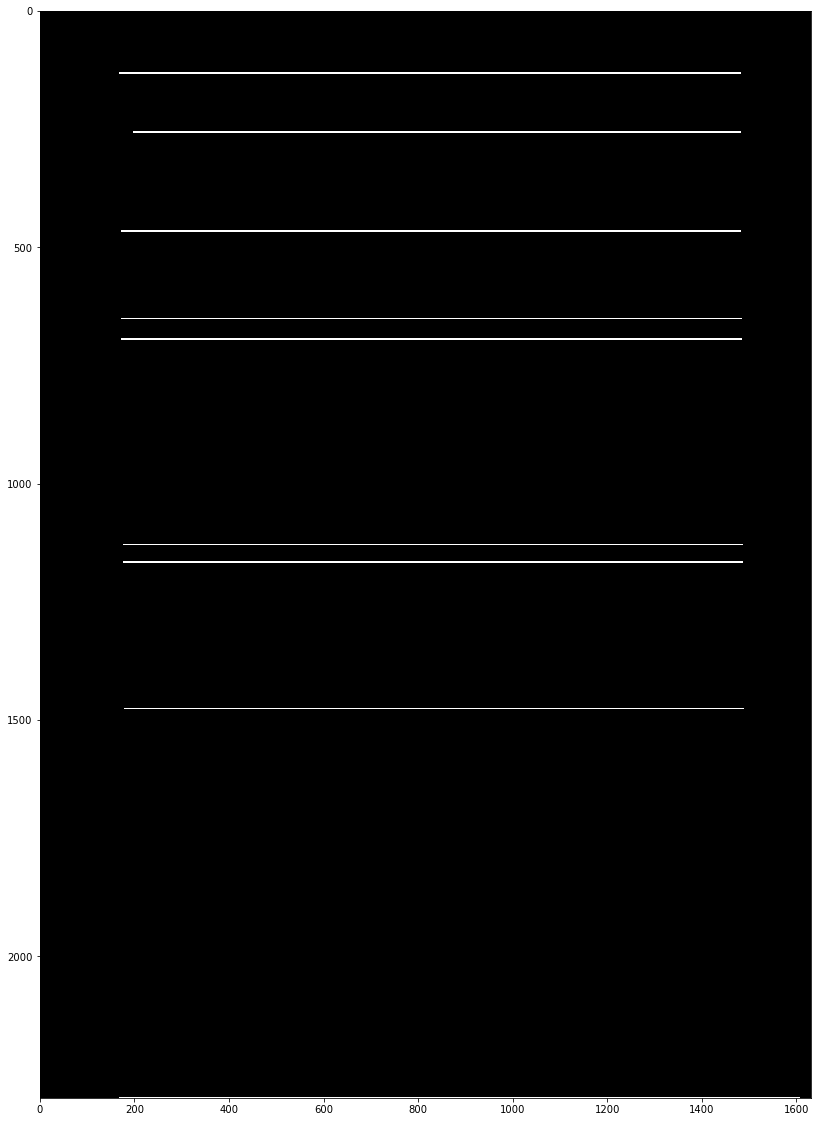

(2300, 1631)

In [71]:
w=1631
h=2300
# Make empty black image
white = 225
image=np.zeros((h,w),np.uint8)
for val in zip(y3,x3):
    image[val[0],val[1]]=white
    for i in range(1,2):
        image[val[0]-i,val[1]]=white
        image[val[0]+i,val[1]]=white
print(image[500,1506])
plt.figure(figsize = (40,20))
plotting = plt.imshow(image,cmap='gray')
plt.show()
image_1 = image
image.shape

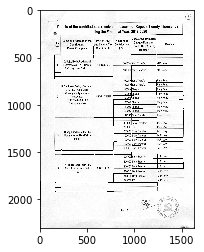

In [72]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# cv2.imwrite("/Users/YOURPATH/img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [73]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [74]:
def sort_contours(cnts, method="left-to-right"):    # initialize the reverse flag and sort index
    reverse = False
    i = 0    
    
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True    # handle if we are sorting against the y-coordinate rather than
    
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1    # construct the list of bounding boxes and sort them from top to
    
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),key=lambda b:b[1][i], reverse=reverse))    
    
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

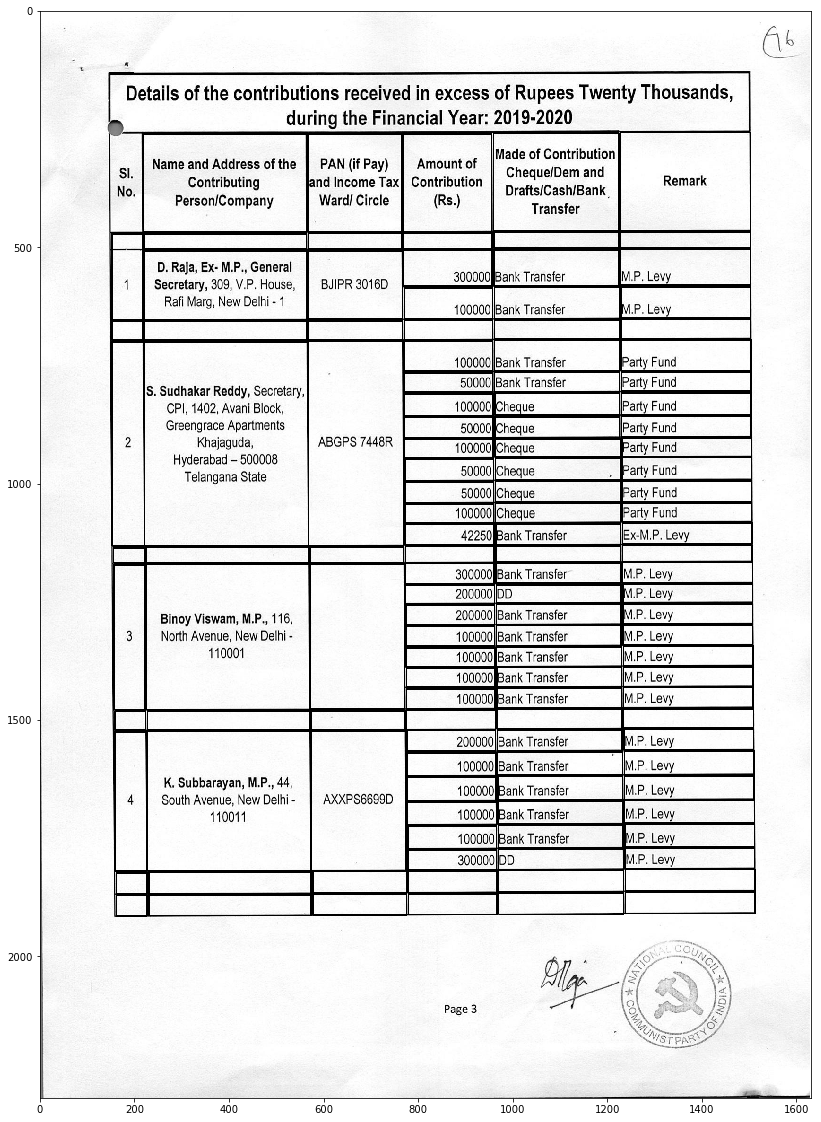

In [75]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)

#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
        
plt.figure(figsize = (40,20))        
plotting = plt.imshow(image,cmap='gray')
plt.show()

In [76]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0

#Sorting the boxes to their respective row and column
for i in range(len(box)):    
        
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]            
            
            if(i==len(box)-1):
                row.append(column)        
            
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
            
print(column)
print(row)

[[1496, 2299, 23, 1]]
[[[146, 132, 50, 3]], [[1227, 257, 275, 209], [959, 259, 265, 208], [768, 260, 187, 208], [566, 261, 199, 207], [219, 261, 344, 208]], [[1228, 468, 274, 35], [960, 468, 264, 35], [769, 470, 187, 34], [567, 470, 198, 35], [220, 471, 343, 34], [152, 471, 65, 183], [1228, 504, 274, 77], [960, 505, 264, 78], [769, 506, 187, 77], [567, 507, 199, 146], [220, 507, 344, 147]], [[1229, 583, 274, 68], [961, 584, 264, 68], [770, 585, 187, 68]], [[1229, 652, 274, 42], [961, 653, 264, 42], [770, 654, 187, 42], [568, 655, 198, 41], [221, 655, 343, 42], [152, 656, 65, 41], [1229, 695, 275, 67], [961, 696, 265, 67], [770, 697, 187, 66], [568, 698, 201, 433], [221, 699, 346, 433], [152, 699, 68, 433]], [[1230, 763, 274, 42], [961, 764, 265, 42], [770, 765, 187, 42], [1230, 807, 274, 48], [962, 808, 264, 48], [771, 809, 187, 48], [1230, 857, 274, 45], [962, 858, 264, 45], [771, 859, 187, 44], [1231, 903, 274, 40], [962, 904, 265, 40], [771, 905, 187, 40], [1231, 944, 274, 48], [963

In [77]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()
print(center)

[   0  187  189  190  192  193  193  395  396  398  399  401  401  670
  671  672  674  676  676  863  864  864  864  865  865  865  866  866
  866  867  867  867  868  868  868  869  869  870  870  871  871  871
  872  872 1093 1094 1094 1094 1095 1095 1095 1096 1096 1096 1097 1097
 1097 1097 1098 1098 1098 1099 1099 1100 1100 1101 1101 1101 1102 1367
 1367 1367 1368 1368 1368 1368 1369 1369 1369 1370 1370 1370 1371 1371
 1371 1371 1372 1373 1373 1373 1374 1374 1375 1375]


In [78]:
#Regarding the distance to the columns center, the boxes are arranged in respective order

finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [79]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

In [80]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")

# data = data.applymap(lambda x: x.encode('unicode_escape').
#                  decode('utf-8') if isinstance(x, str) else x)

#Converting it in a excel-file
data.to_excel("output.xlsx", engine='xlsxwriter')
dataframe.to_csv("output.csv")

   0             1  2  3  4  5  6   \
0                                   
1                                    
2                                   
3                                    
4                                  
5                             

                                                  7  8  9   ... 84 85 86 87  \
0                                                           ...               
1      \n  \n \n\nName and Address of the\nContri...        ...               
2    D. Raja, Ex- M.P., General\nSecretary, 309,...        ...               
3                                                           ...               
4     \n\nS. Sudhakar Reddy, Secretary, |\nCPI, ...        ...               
5     \n\nBinoy Viswam, M.P., 116,\nNorth Avenue...        ...               

  88 89 90 91 92 93  
0                    
1                    
2                    
3                    
4                    
5                    

[6 rows x 94 columns]


In [81]:
data